# Modiulo 2

## Otimização: A Matemática do Aprendizado

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Configuração de estilo para os gráficos
plt.rcParams['figure.figsize'] = [8, 5]
print("Ambiente de Aprendizado Estatístico configurado.")

Ambiente de Aprendizado Estatístico configurado.


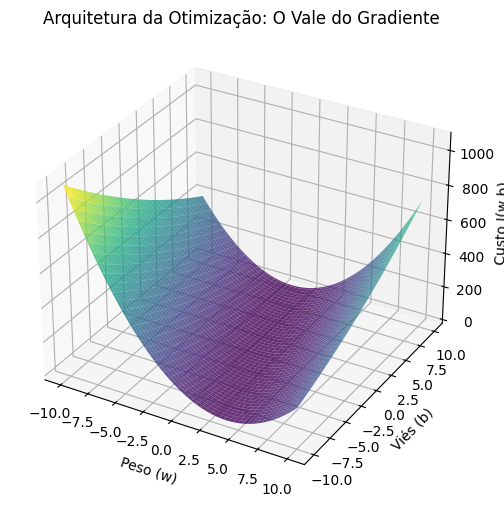

In [9]:
# 1. Simulação de Dados Lineares com Ruído
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5]) # Dados reais

# 2. Definição Manual da Função de Custo (para visualização)
def compute_cost(w, b, X, y):
    m = len(y)
    predictions = w * X + b
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost

# 3. Mapeando a Superfície de Erro (Grid Search visual)
w_vals = np.linspace(-10, 10, 100)
b_vals = np.linspace(-10, 10, 100)
W, B = np.meshgrid(w_vals, b_vals)
J_vals = np.array([compute_cost(w, b, X, y) for w, b in zip(np.ravel(W), np.ravel(B))])
J_vals = J_vals.reshape(W.shape)

# 4. Plotagem da Loss Landscape
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, J_vals, cmap='viridis', alpha=0.8)
ax.set_xlabel('Peso (w)')
ax.set_ylabel('Viés (b)')
ax.set_zlabel('Custo J(w,b)')
ax.set_title('Arquitetura da Otimização: O Vale do Gradiente')
plt.show()

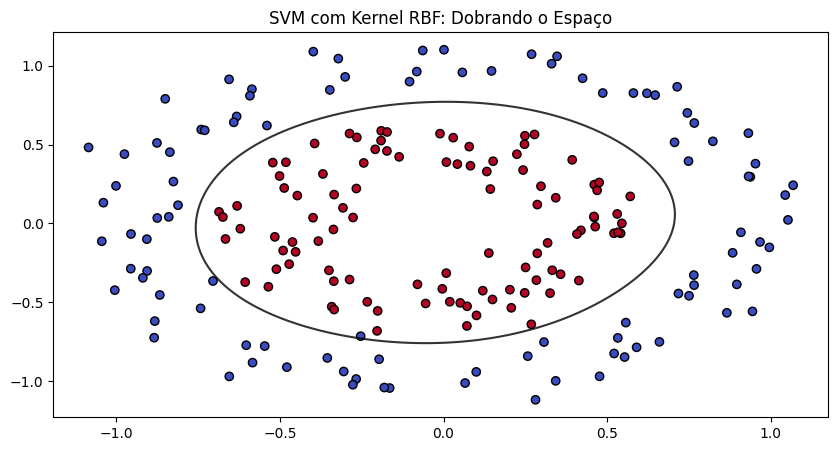

In [19]:
# Gerar dados concêntricos (Complexidade Não-Linear)
X_circ, y_circ = make_circles(n_samples=200, factor=0.5, noise=0.1)

# A. Treinamento do SVM com Kernel RBF (Radial Basis Function)
svm_rbf = SVC(kernel='rbf', C=1.0)
svm_rbf.fit(X_circ, y_circ)

# Visualização da Fronteira de Decisão
plt.figure(figsize=(10, 5))
plt.scatter(X_circ[:, 0], X_circ[:, 1], c=y_circ, cmap='coolwarm', edgecolors='k')

# Criando a malha para desenhar a curva de decisão
ax = plt.gca()
xlim, ylim = ax.get_xlim(), ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), 
                     np.linspace(ylim[0], ylim[1], 100))
# O modelo prevê a distância para a fronteira em cada ponto do grid
Z = svm_rbf.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Desenhando a curva de nível onde a decisão é neutra (Fronteira)
ax.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.8, linestyles=['-'])
plt.title("SVM com Kernel RBF: Dobrando o Espaço")
plt.show()

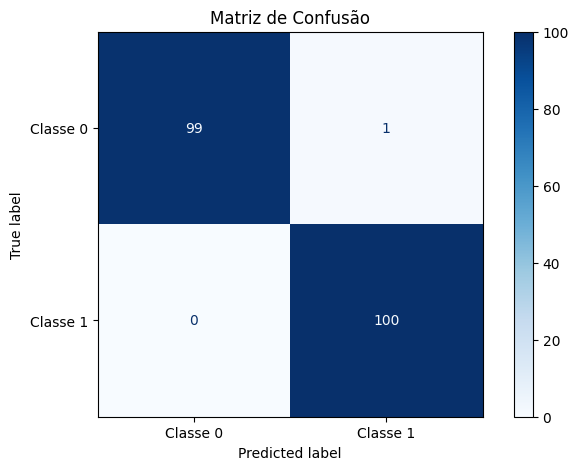


--- Relatório de Classificação (Precision, Recall, F1) ---
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       100
           1       0.99      1.00      1.00       100

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



In [20]:
# Predição nos mesmos dados de treino (para fins didáticos de validação)
y_pred = svm_rbf.predict(X_circ)

# 1. Matriz de Confusão Visual
cm = confusion_matrix(y_circ, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Classe 0', 'Classe 1'])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão")
plt.show()

# 2. Relatório Métrico Detalhado
print("\n--- Relatório de Classificação (Precision, Recall, F1) ---")
print(classification_report(y_circ, y_pred))